In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
# Read saved csv files
Data = pd.read_csv('Data.csv', index_col=0)

In [3]:
Data['start time'] = pd.to_datetime(Data['start time'],unit='s')
Data['lock time'] = pd.to_datetime(Data['lock time'],unit='s')
Data['close time'] = pd.to_datetime(Data['close time'],unit='s')

In [4]:
Data.tail()

,start time,lock time,close time,epoch,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
3485,2022-04-30 12:16:16,2022-04-30 12:21:16,2022-04-30 12:26:16,3494,38565.63,38585.44,19.81,21.5631,10.8571,10.7060,1
3486,2022-04-30 12:21:22,2022-04-30 12:26:22,2022-04-30 12:31:22,3495,38585.44,38604.62,19.18,20.9530,10.4845,10.4685,1
3487,2022-04-30 12:26:28,2022-04-30 12:31:28,2022-04-30 12:36:28,3496,38604.62,38562.02,-42.60,21.2856,10.5928,10.6928,0
3488,2022-04-30 12:31:34,2022-04-30 12:36:34,2022-04-30 12:41:34,3497,38562.02,38551.49,-10.53,20.9466,10.5876,10.3589,0
3489,2022-04-30 12:36:40,2022-04-30 12:41:40,2022-04-30 12:46:40,3498,38551.49,38557.31,5.82,21.1966,10.7233,10.4733,1


In [5]:
Data.drop(columns=["epoch", "start time", "close time"], inplace=True)

In [6]:
Data.head()

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
0,2022-04-18 03:23:46,39804.06,39824.30,20.24,15.4700,7.8164,7.8164,1
1,2022-04-18 03:28:55,39824.30,39817.06,-7.24,11.2942,5.7065,5.7065,0
2,2022-04-18 03:34:01,39817.06,39816.73,-0.33,14.1498,7.1494,7.1494,0
3,2022-04-18 03:39:08,39816.73,39826.39,9.66,12.6801,6.4068,6.4068,1
4,2022-04-18 03:44:17,39826.39,39851.42,25.03,10.2198,5.1637,5.1637,1


In [7]:
Data.head()

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
0,2022-04-18 03:23:46,39804.06,39824.30,20.24,15.4700,7.8164,7.8164,1
1,2022-04-18 03:28:55,39824.30,39817.06,-7.24,11.2942,5.7065,5.7065,0
2,2022-04-18 03:34:01,39817.06,39816.73,-0.33,14.1498,7.1494,7.1494,0
3,2022-04-18 03:39:08,39816.73,39826.39,9.66,12.6801,6.4068,6.4068,1
4,2022-04-18 03:44:17,39826.39,39851.42,25.03,10.2198,5.1637,5.1637,1


In [8]:
Data.tail()

,lock time,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
3485,2022-04-30 12:21:16,38565.63,38585.44,19.81,21.5631,10.8571,10.7060,1
3486,2022-04-30 12:26:22,38585.44,38604.62,19.18,20.9530,10.4845,10.4685,1
3487,2022-04-30 12:31:28,38604.62,38562.02,-42.60,21.2856,10.5928,10.6928,0
3488,2022-04-30 12:36:34,38562.02,38551.49,-10.53,20.9466,10.5876,10.3589,0
3489,2022-04-30 12:41:40,38551.49,38557.31,5.82,21.1966,10.7233,10.4733,1


In [9]:
# map timestamp to a variable x
x = np.linspace(0, len(Data), len(Data))

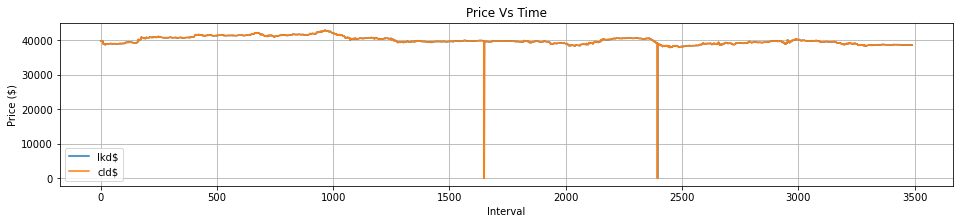

In [10]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.plot(x, Data['Locked price'], label=r'lkd$')
axes.plot(x, Data['Close price'], label=r'cld$')
axes.set_xlabel('Interval')
axes.set_ylabel('Price ($)')
axes.set_title('Price Vs Time')

# axes.set_ylim(0,750)
axes.legend()
axes.grid()

### Data Quality

#### Check for null values

In [11]:
Data.isnull().any()

lock time       False
Locked price    False
Close price     False
Change          False
Total BNB       False
Up BNB          False
Down BNB        False
Win/Lose        False
dtype: bool

In [12]:
Data.isnull().sum()

lock time       0
Locked price    0
Close price     0
Change          0
Total BNB       0
Up BNB          0
Down BNB        0
Win/Lose        0
dtype: int64

In [13]:
Data.isnull().sum().sum()

0

#### Remove Zeros

In [14]:
len(Data)

3490

In [15]:
Data[['Locked price', 'Close price']].eq(0).sum()

Locked price    2
Close price     4
dtype: int64

In [16]:
Data.describe()

,Locked price,Close price,Change,Total BNB,Up BNB,Down BNB,Win/Lose
count,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000,3490.000000
mean,39895.922957,39873.023430,-22.899527,17.741497,8.925623,8.841145,0.498854
std,1417.659689,1709.368217,946.557329,7.088435,3.579457,3.559974,0.500070
min,0.000000,0.000000,-39790.740000,0.000000,0.000000,0.000000,0.000000
25%,39112.190000,39110.052500,-27.927500,12.018500,6.022800,5.985125,0.000000
50%,39688.505000,39688.170000,-0.010000,18.084500,9.053750,8.900650,0.000000
75%,40681.852500,40681.852500,26.110000,22.700125,11.419275,11.315875,1.000000
max,42900.710000,42900.710000,771.880000,34.054100,17.649800,17.272900,1.000000


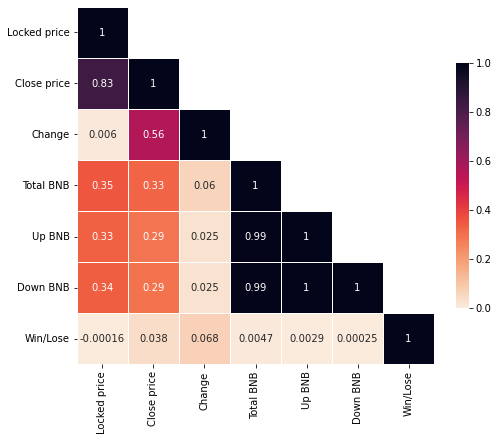

In [17]:
# The above as a plot

corr = Data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

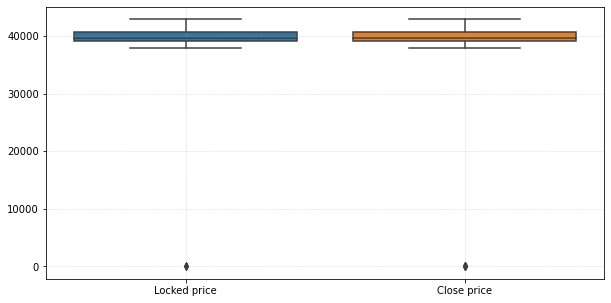

In [18]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=Data[['Locked price', 'Close price']])

ax.grid(linestyle='--', linewidth=0.5, alpha =0.5)

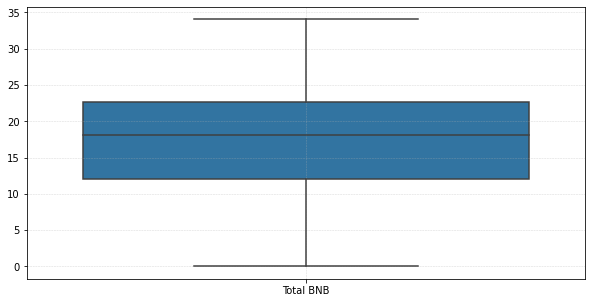

In [19]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=Data[['Total BNB']])

ax.grid(linestyle='--', linewidth=0.5, alpha =0.5)

In [20]:
Data.isnull().sum().sum()

0

In [21]:
Data.head(10)[['lock time','Win/Lose']]

,lock time,Win/Lose
0,2022-04-18 03:23:46,1
1,2022-04-18 03:28:55,0
2,2022-04-18 03:34:01,0
3,2022-04-18 03:39:08,1
4,2022-04-18 03:44:17,1
5,2022-04-18 03:49:23,0
6,2022-04-18 03:54:32,0
7,2022-04-18 03:59:41,0
8,2022-04-18 04:04:47,0
9,2022-04-18 04:09:53,0


In [22]:
b = Data.head(10).groupby(pd.Grouper(key='lock time', freq='5min')).mean()['Win/Lose']

In [23]:
b

lock time
2022-04-18 03:20:00    1.0
2022-04-18 03:25:00    0.0
2022-04-18 03:30:00    0.0
2022-04-18 03:35:00    1.0
2022-04-18 03:40:00    1.0
2022-04-18 03:45:00    0.0
2022-04-18 03:50:00    0.0
2022-04-18 03:55:00    0.0
2022-04-18 04:00:00    0.0
2022-04-18 04:05:00    0.0
Freq: 5T, Name: Win/Lose, dtype: float64

In [24]:
a = Data.groupby(pd.Grouper(key='lock time', freq='5min')).mean()['Win/Lose']

In [25]:
a = pd.DataFrame(a)

In [26]:
a.index

DatetimeIndex(['2022-04-18 03:20:00', '2022-04-18 03:25:00',
               '2022-04-18 03:30:00', '2022-04-18 03:35:00',
               '2022-04-18 03:40:00', '2022-04-18 03:45:00',
               '2022-04-18 03:50:00', '2022-04-18 03:55:00',
               '2022-04-18 04:00:00', '2022-04-18 04:05:00',
               ...
               '2022-04-30 11:55:00', '2022-04-30 12:00:00',
               '2022-04-30 12:05:00', '2022-04-30 12:10:00',
               '2022-04-30 12:15:00', '2022-04-30 12:20:00',
               '2022-04-30 12:25:00', '2022-04-30 12:30:00',
               '2022-04-30 12:35:00', '2022-04-30 12:40:00'],
              dtype='datetime64[ns]', name='lock time', length=3569, freq='5T')

# Visualization

In [27]:
grouped_df = a.groupby([a.index.date])


grouped_lists = grouped_df["Win/Lose"].apply(list)


grouped_lists = grouped_lists.reset_index()

In [28]:
grouped_lists["index"] = pd.to_datetime(grouped_lists["index"])

In [29]:
grouped_lists['day'] = grouped_lists['index'].dt.day_name()

In [30]:
grouped_lists

,index,Win/Lose,day
0,2022-04-18,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",Monday
1,2022-04-19,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, nan, 0.0, 0.0, ...",Tuesday
2,2022-04-20,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...",Wednesday
3,2022-04-21,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",Thursday
4,2022-04-22,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...",Friday
5,2022-04-23,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...",Saturday
6,2022-04-24,"[nan, nan, nan, nan, 0.5, 1.0, 1.0, 0.0, 0.0, ...",Sunday
7,2022-04-25,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",Monday
8,2022-04-26,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",Tuesday
9,2022-04-27,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...",Wednesday


In [31]:
# len(grouped_lists["Win/Lose"].iloc[12])

In [32]:
x = []

for i in range(len(grouped_lists)):
    data = grouped_lists["Win/Lose"].iloc[i]
    x.append(data)
    
    
df = pd.DataFrame(data=x)
df = df.drop(index=[0,12])                            # Drop 1st and last column: incomplete
df.index = grouped_lists["day"][1:12]                 # IMPORTANT TOO

In [33]:
df

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
day,,,,,,,,,,,,,,,,,,,,,
Tuesday,1.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Wednesday,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
Thursday,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,NaN,0.0,1.0,0.0,1.0,0.0
Friday,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Saturday,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
Sunday,NaN,NaN,NaN,NaN,0.5,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Monday,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
Tuesday,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
Wednesday,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [34]:
df1 = df.T

In [35]:
df1

day,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
0,1.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,NaN,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.5,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
284,0.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0
285,1.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,0.0
286,0.0,0.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,1.0


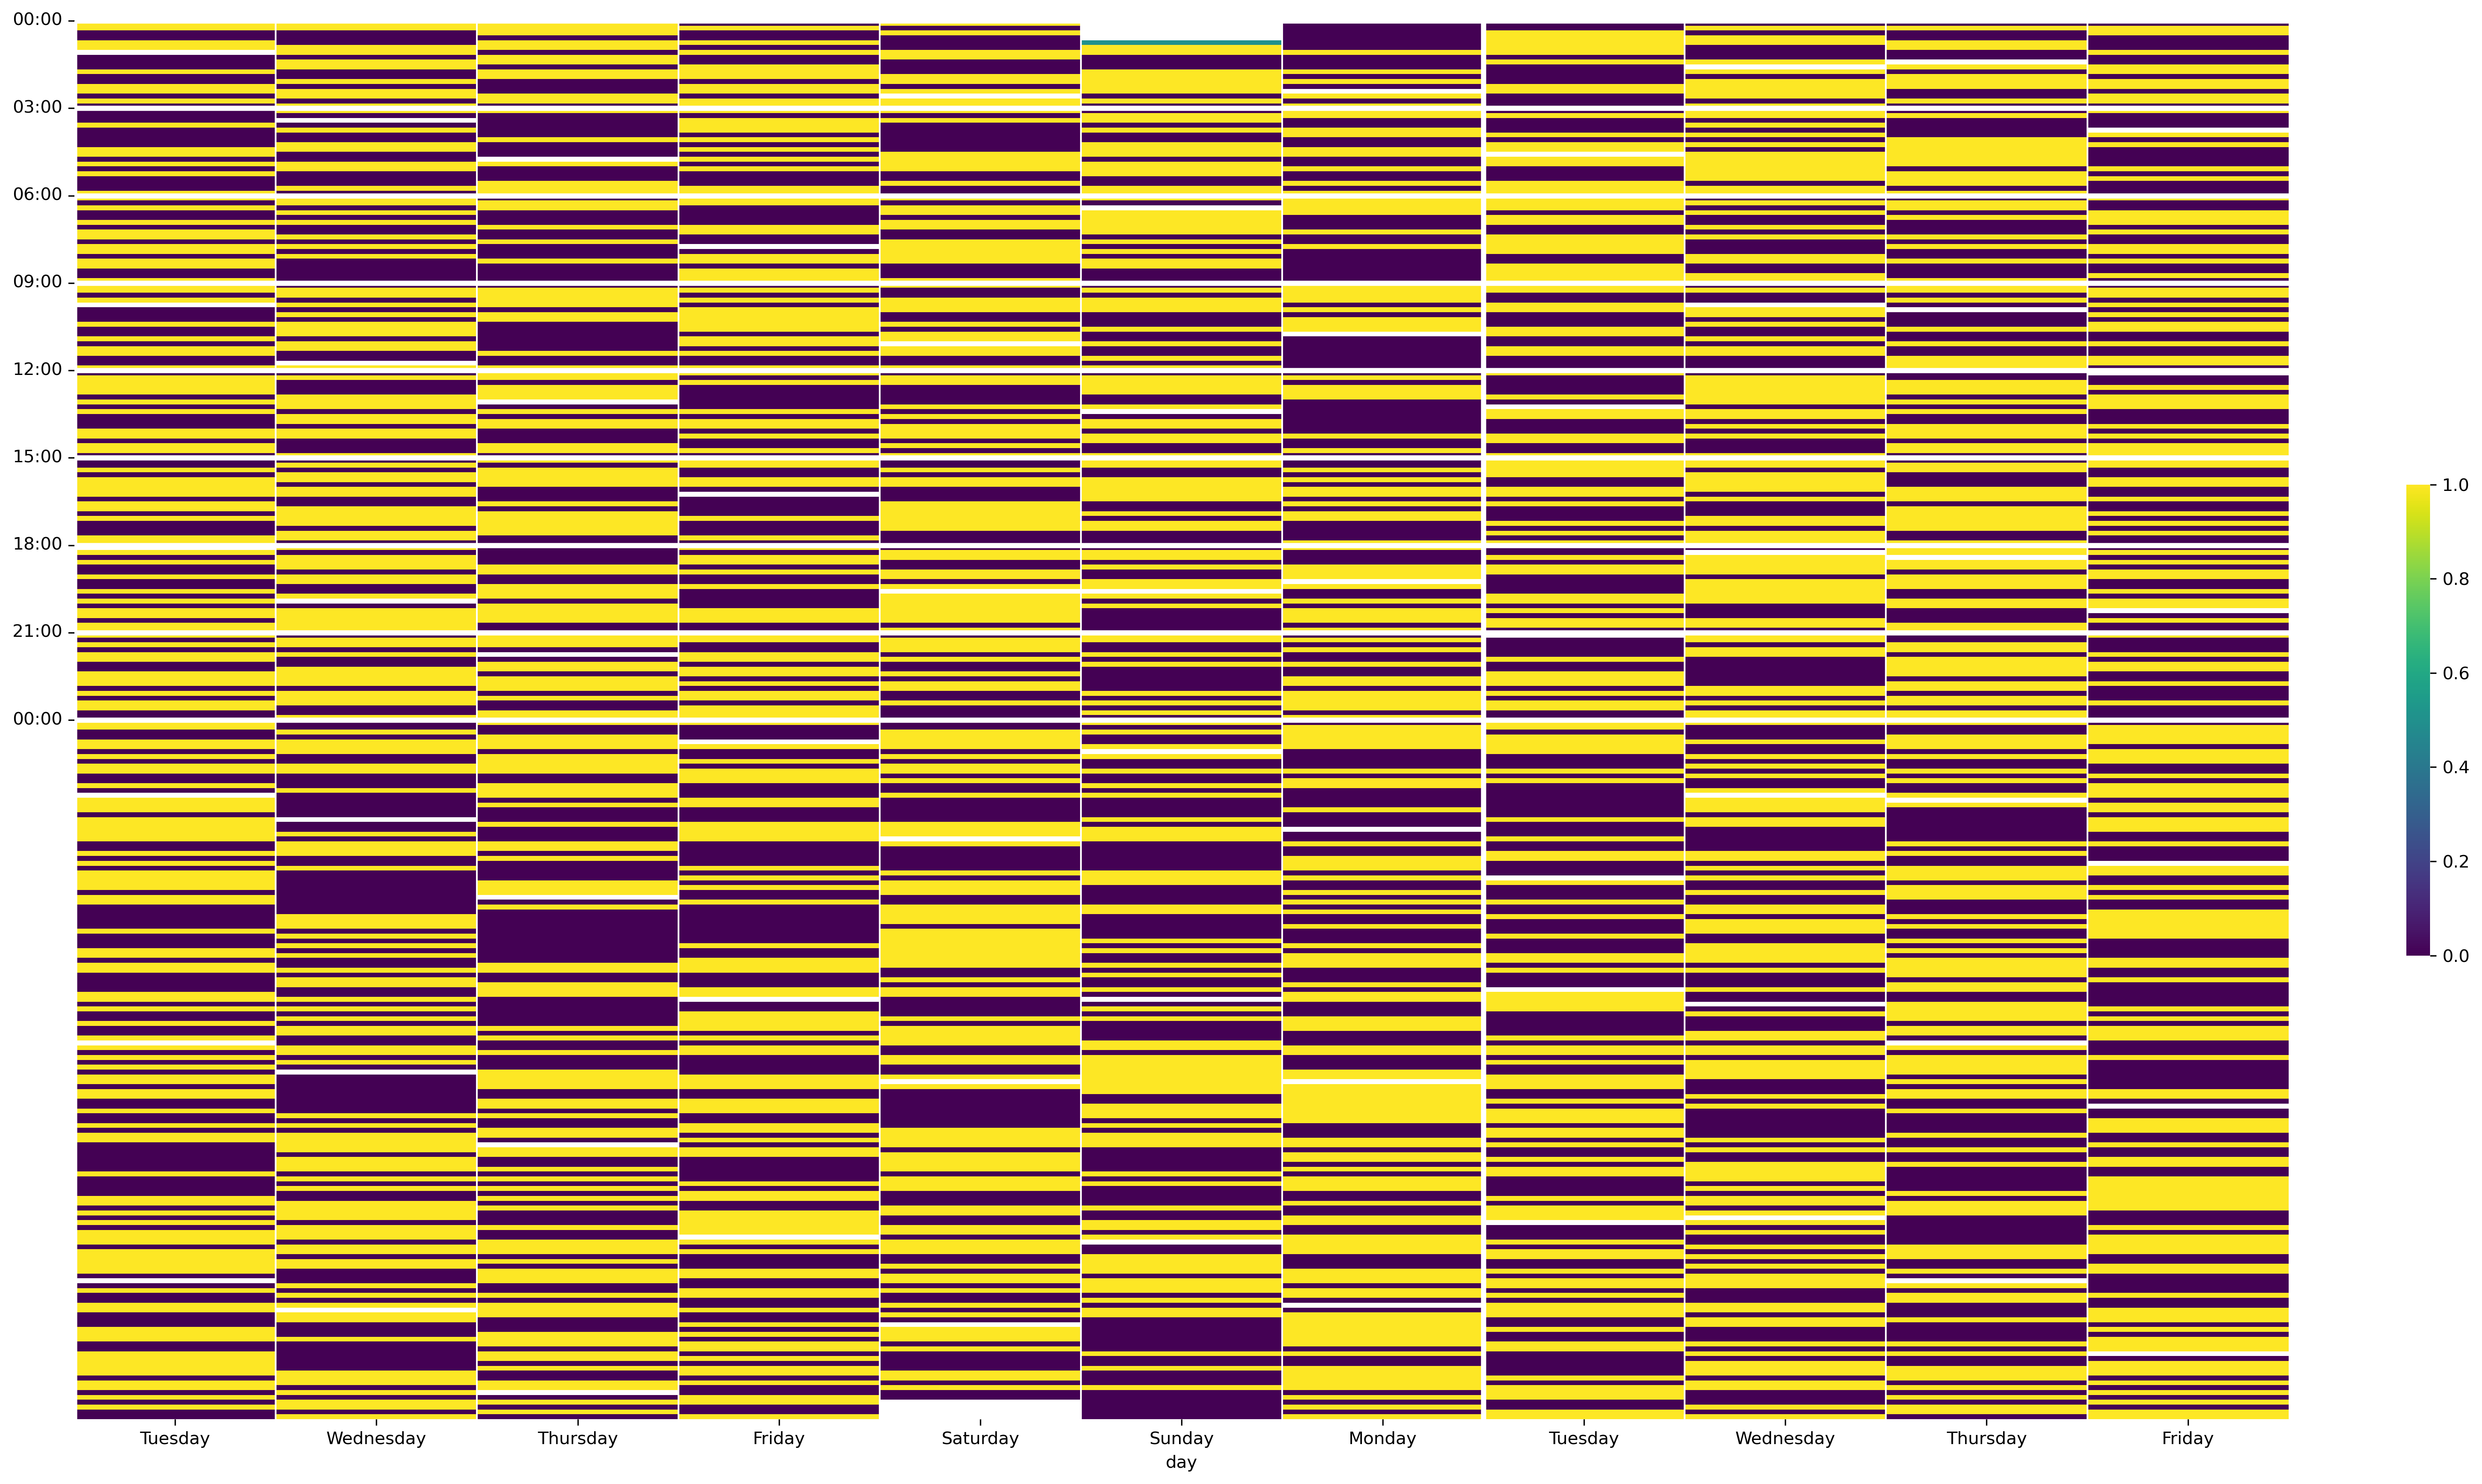

In [36]:
plt.figure(figsize=(20,12), dpi=300)

ticks = [0, 18, 36, 54, 72, 90, 108, 126, 144]
hmap = sns.heatmap(df1.astype(float),
                  xticklabels=True,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )

for i in ticks:
    hmap.axhline(i, color='white', lw=3)
for j in range(0,df1.shape[1],7):
    hmap.axvline(j, color='white', lw=3)
for j in range(0,df1.shape[1],1):
    hmap.axvline(j, color='white', lw=1)
    
    
#hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90);
hmap.set_yticks([0, 18, 36, 54, 72, 90, 108, 126, 144]);
hmap.set_yticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()

In [37]:
df2 = df1[df1 > 0.7]

In [38]:
df2

day,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
283,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN
284,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
285,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN
286,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0


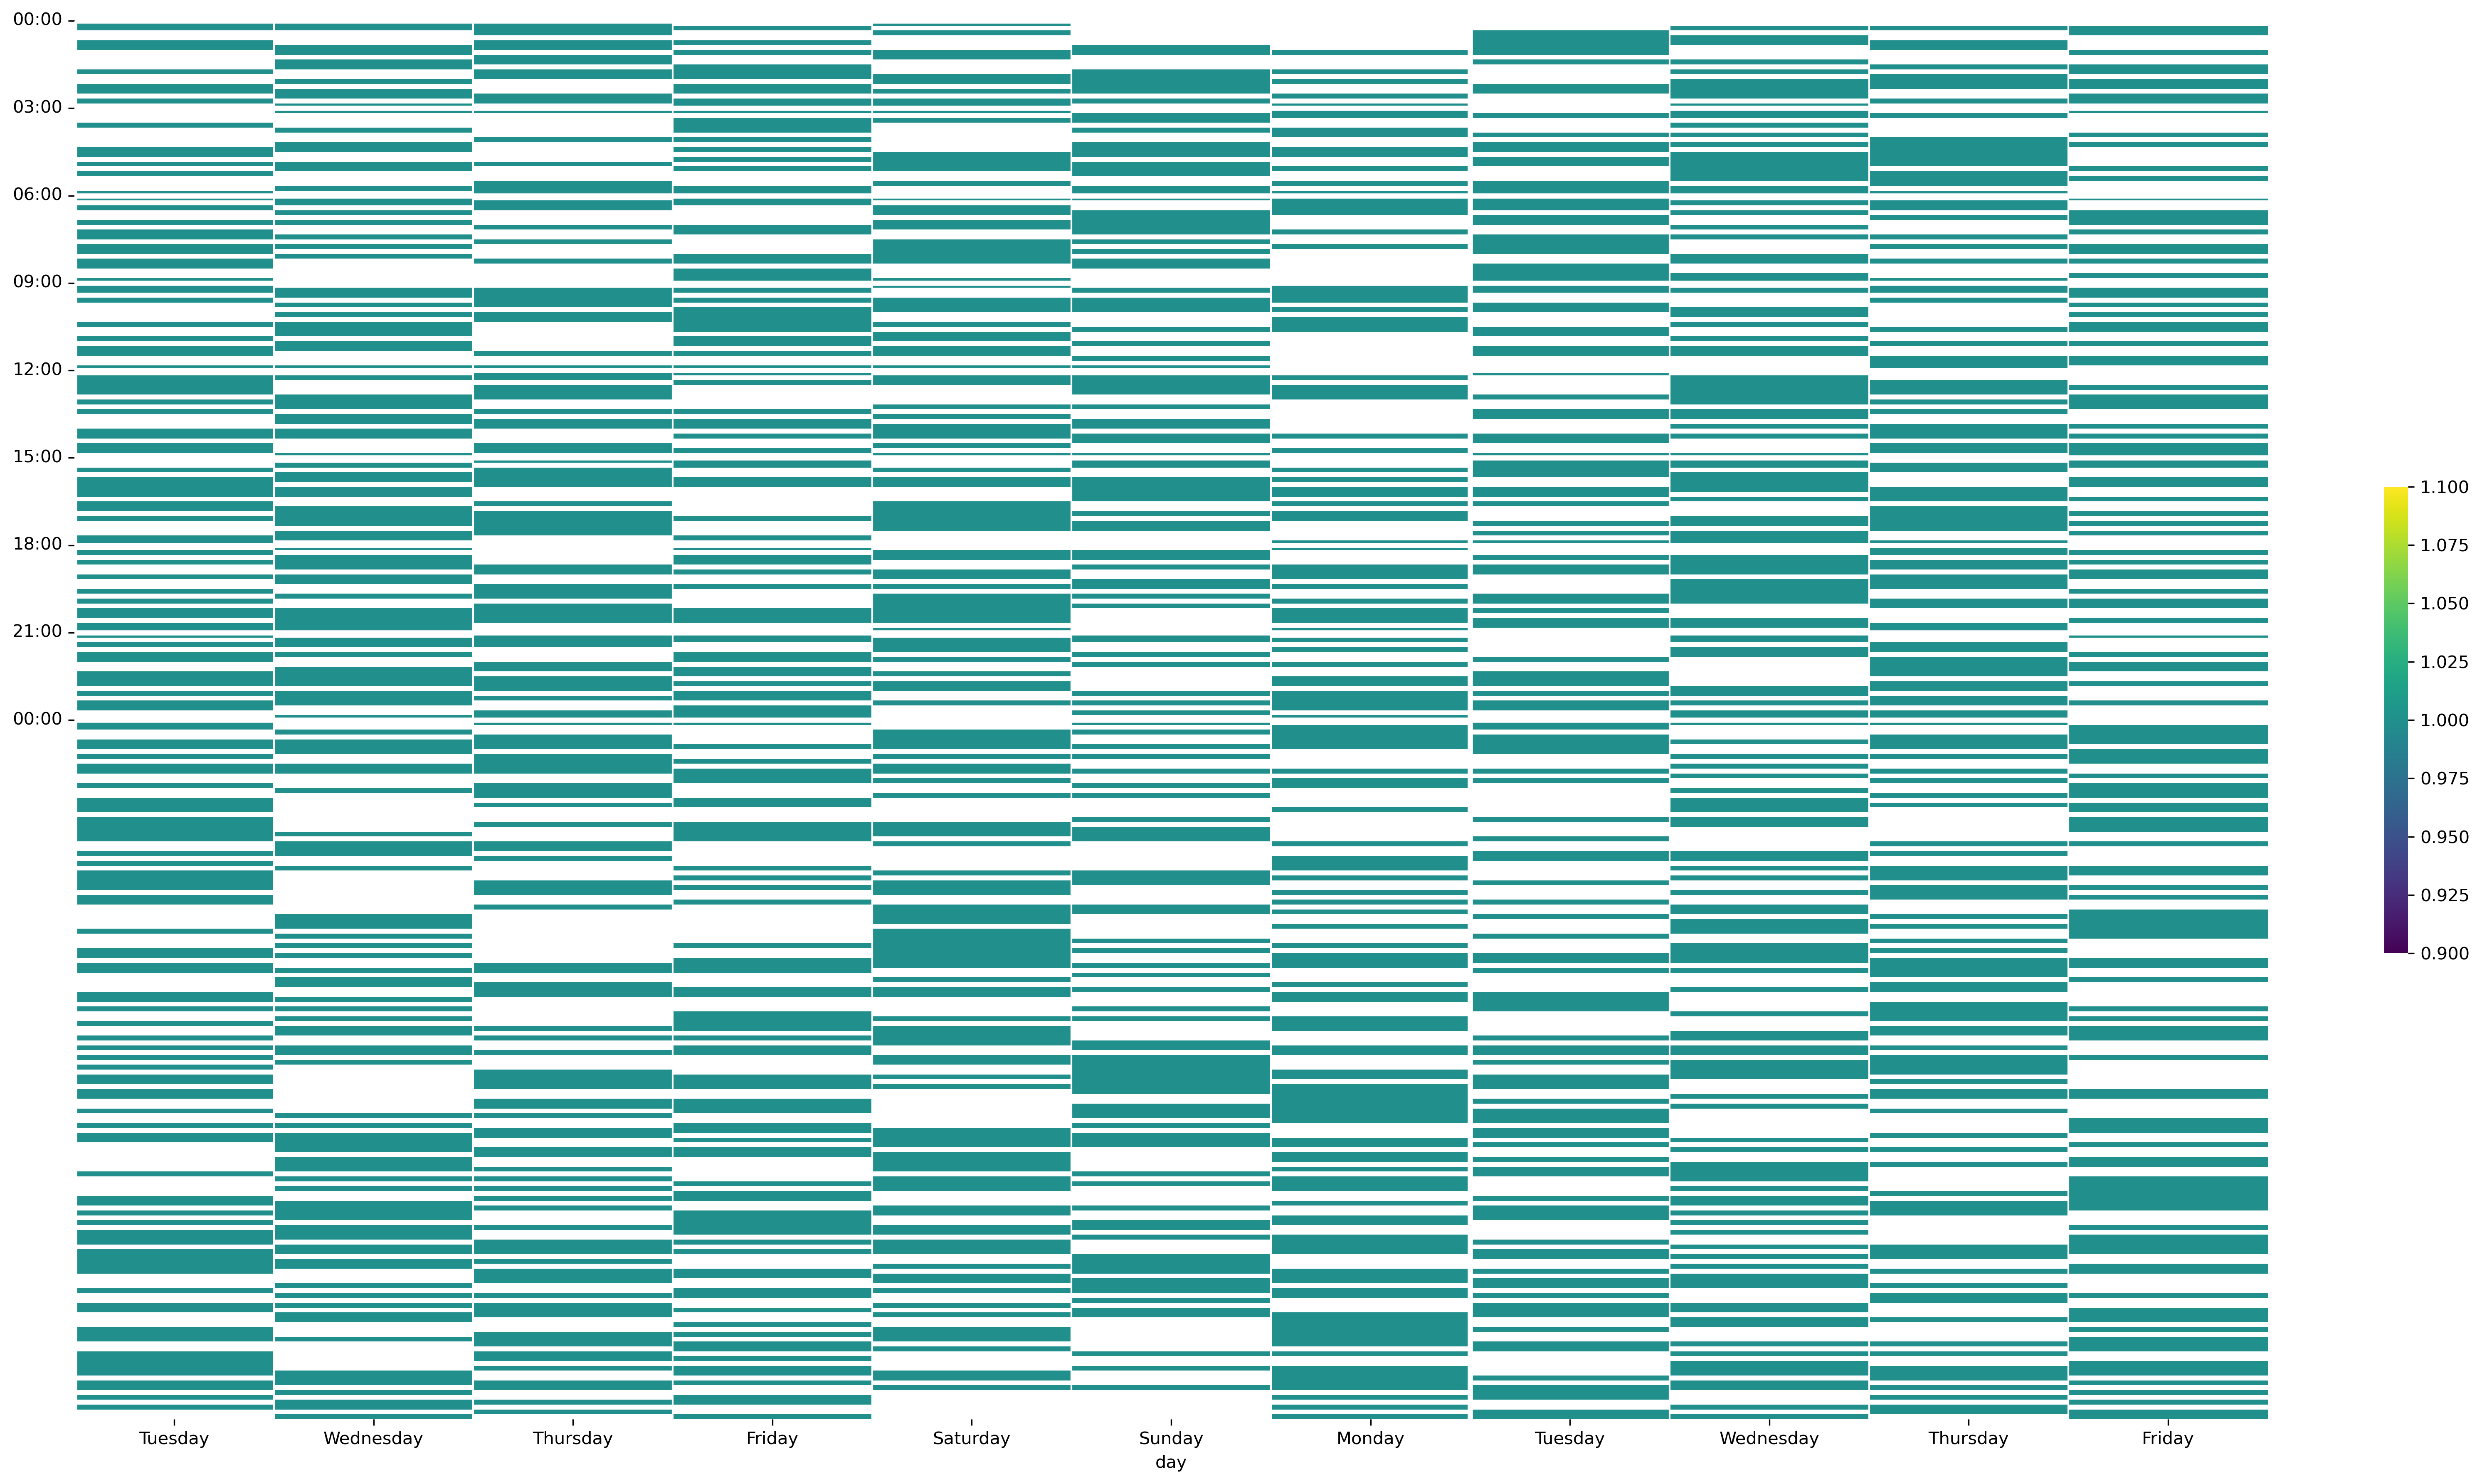

In [39]:
plt.figure(figsize=(20,12), dpi=300)

ticks = [0, 18, 36, 54, 72, 90, 108, 126, 144]
hmap = sns.heatmap(df2.astype(float),
                  xticklabels=True,
                  cbar=True,
                  cbar_kws={'fraction' : 0.01}, # shrink colour bar
                  cmap='viridis',
                  robust=True,
                 )

for i in ticks:
    hmap.axhline(i, color='white', lw=3)
for j in range(0,df1.shape[1],7):
    hmap.axvline(j, color='white', lw=3)
for j in range(0,df1.shape[1],1):
    hmap.axvline(j, color='white', lw=1)
    
    
#hmap.set_xticklabels(hmap.get_xticklabels(), rotation=90);
hmap.set_yticks([0, 18, 36, 54, 72, 90, 108, 126, 144]);
hmap.set_yticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00']);
plt.tight_layout()
plt.show()

In [40]:
df1.mean()

day
Tuesday      0.510638
Wednesday    0.500000
Thursday     0.485816
Friday       0.491166
Saturday     0.528777
Sunday       0.469424
Monday       0.489362
Tuesday      0.471631
Wednesday    0.531915
Thursday     0.510638
Friday       0.485816
dtype: float64

In [41]:
df1.mean(axis=1)

0      0.400000
1      0.700000
2      0.400000
3      0.200000
4      0.590909
         ...   
283    0.454545
284    0.400000
285    0.500000
286    0.400000
287    0.600000
Length: 288, dtype: float64

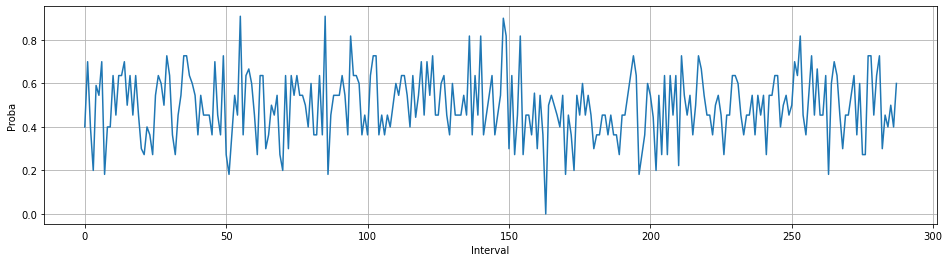

In [42]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,4))

# Now use the axes object to add stuff to plot
axes.plot(df1.mean(axis=1))
axes.set_xlabel('Interval')
axes.set_ylabel('Proba')

# axes.set_ylim(0,750)
axes.grid()

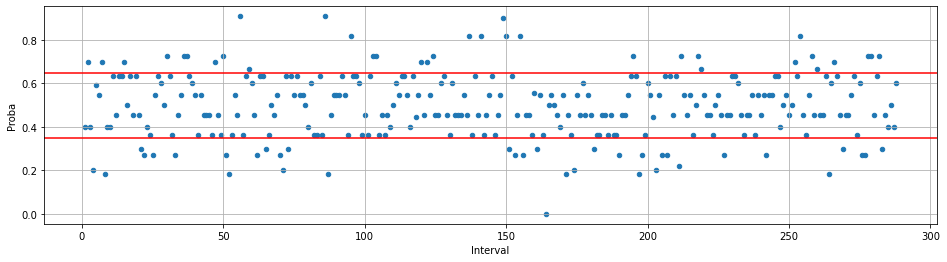

In [43]:
x = np.arange(1,len(df1)+1)

# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,4))

# Now use the axes object to add stuff to plot
axes.scatter(x, df1.mean(axis=1), 20)
axes.axhline(y=0.65, color='r', linestyle='-')
axes.axhline(y=0.35, color='r', linestyle='-')
axes.set_xlabel('Interval')
axes.set_ylabel('Proba')

# axes.set_ylim(0.2,0.9)
axes.grid()